In [1]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support,precision_score
import random
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.utils import resample
import seaborn as sns

In [ ]:
data = pd.read_csv('wine-quality-white-and-red.csv')
data['quality'] = np.where(data['quality'] > 5, 1, 0)
data['wineType'] = np.where(data['type'] == "white", 1, 0)
wineData = data[['fixed acidity', 'wineType', 'volatile acidity', 'citric acid', 'total sulfur dioxide', 'pH', 'quality']].copy()
wineData.reset_index()

,index,fixed acidity,wineType,volatile acidity,citric acid,total sulfur dioxide,pH,quality
0,0,7.0,1,0.270,0.36,170.0,3.00,1
1,1,6.3,1,0.300,0.34,132.0,3.30,1
2,2,8.1,1,0.280,0.40,97.0,3.26,1
3,3,7.2,1,0.230,0.32,186.0,3.19,1
4,4,7.2,1,0.230,0.32,186.0,3.19,1
...,...,...,...,...,...,...,...,...
6492,6492,6.2,0,0.600,0.08,44.0,3.45,0
6493,6493,5.9,0,0.550,0.10,51.0,3.52,1
6494,6494,6.3,0,0.510,0.13,40.0,3.42,1
6495,6495,5.9,0,0.645,0.12,44.0,3.57,0


In [ ]:
# Standardize input variables

wineData['fixed acidity'] = (wineData['fixed acidity'] - wineData['fixed acidity'].mean()) / wineData['fixed acidity'].std()

wineData['volatile acidity'] = (wineData['volatile acidity'] - wineData['volatile acidity'].mean()) / wineData['volatile acidity'].std()

wineData['citric acid'] = (wineData['citric acid'] - wineData['citric acid'].mean()) / wineData['citric acid'].std()

wineData['total sulfur dioxide'] = (wineData['total sulfur dioxide'] - wineData['total sulfur dioxide'].mean()) / wineData['total sulfur dioxide'].std()

wineData['pH'] = (wineData['pH'] - wineData['pH'].mean()) / wineData['pH'].std()

In [ ]:
wineData = wineData[wineData['total sulfur dioxide'] < 2]
wineData = wineData[wineData['volatile acidity'] < 4]
wineData

,fixed acidity,wineType,volatile acidity,citric acid,total sulfur dioxide,pH,quality
0,-0.166076,1,-0.423150,0.284664,0.959902,-1.358944,1
1,-0.706019,1,-0.240931,0.147035,0.287595,0.506876,1
2,0.682405,1,-0.362411,0.559923,-0.331634,0.258100,1
3,-0.011807,1,-0.666110,0.009405,1.242978,-0.177258,1
4,-0.011807,1,-0.666110,0.009405,1.242978,-0.177258,1
...,...,...,...,...,...,...,...
6492,-0.783154,0,1.581266,-1.642146,-1.269324,1.439786,0
6493,-1.014558,0,1.277566,-1.504517,-1.145479,1.875144,1
6494,-0.706019,0,1.034607,-1.298073,-1.340094,1.253204,1
6495,-1.014558,0,1.854595,-1.366888,-1.269324,2.186114,0


In [ ]:
def getPrecision(lm, X, y):
    
    y_pred = lm.predict(X)

    p,r,f,s = precision_recall_fscore_support(y, y_pred, zero_division=1)
    display('precision = {}'.format(p))
    display('recall = {}'.format(r))
    display('f-score = {}'.format(f))
    
    return [p,r,f,s]

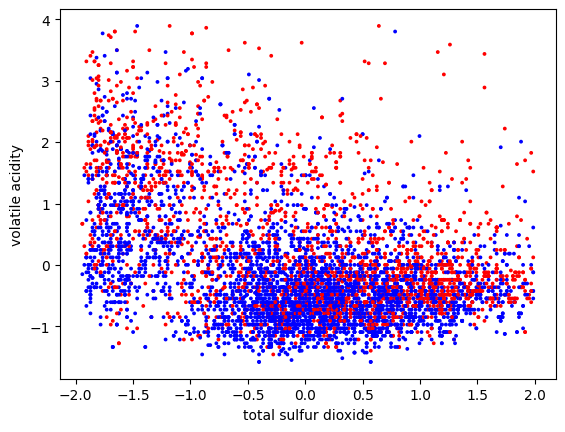

In [ ]:
X = wineData[['total sulfur dioxide', 'volatile acidity']]
y = wineData.quality

lm = LogisticRegression(class_weight={0:0.1, 1:1.0})
lm.fit(X, y)

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(wineData['total sulfur dioxide'], wineData['volatile acidity'], c=color, s=3)
plt.xlabel('total sulfur dioxide')
plt.ylabel('volatile acidity')

# Plot random points colored by predicted value
b0 = lm.intercept_
b = lm.coef_[0]

# Plot random points colored by prediction

n = 5000
newx = [random.uniform(-40,50) for _ in range(n)]
newy = [random.uniform(-40,70) for _ in range(n)]
df_temp = pd.DataFrame({'total sulfur dioxide':newx, 'volatile acidity':newy})
newlabel = lm.predict(df_temp)


Text(0, 0.5, 'volatile acidity')

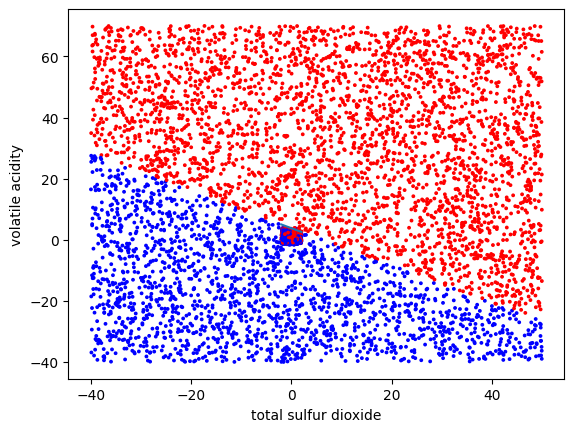

In [ ]:
color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.figure()
plt.scatter(newx, newy, c=color, marker='o', s=3)
plt.xlabel('total sulfur dioxide')
plt.ylabel('volatile acidity')

# Show original data
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(wineData['total sulfur dioxide'], wineData['volatile acidity'], c=color, s=3)

b0 = lm.intercept_[0]
b = lm.coef_[0]

Xdb = [-2, 2]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('total sulfur dioxide')
plt.ylabel('volatile acidity')

'precision_recall_fscore_support values for LogisticRegression'

'precision = [0.85714286 0.63752162]'

'recall = [0.00259628 0.99975339]'

'f-score = [0.00517688 0.77856731]'

[array([0.85714286, 0.63752162]), array([0.00259628, 0.99975339]), array([0.00517688, 0.77856731]), array([2311, 4055])]


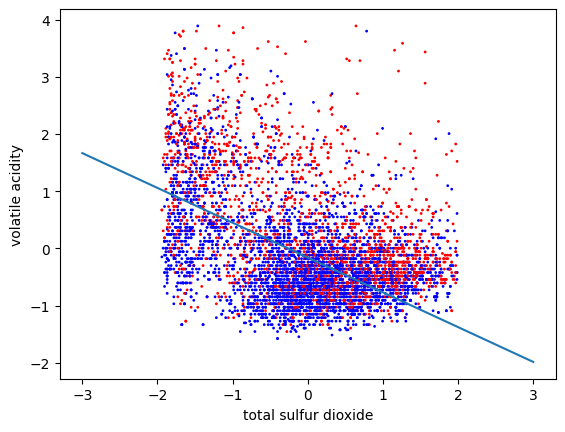

In [ ]:
'total sulfur dioxide', 'volatile acidity'

plt.figure()
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(wineData['total sulfur dioxide'], wineData['volatile acidity'], c=color, s=1)

b0 = lm.intercept_[0] - 3
b = lm.coef_[0]

Xdb = [-3, 3]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
plt.xlabel('total sulfur dioxide')
plt.ylabel('volatile acidity')
display('precision_recall_fscore_support values for LogisticRegression')
value = getPrecision(lm, X, y)
print(value)

'precision_recall_fscore_support values for SVM'

'precision = [0.69758065 0.65053939]'

'recall = [0.07485937 0.98150432]'

'f-score = [0.13520907 0.78246338]'

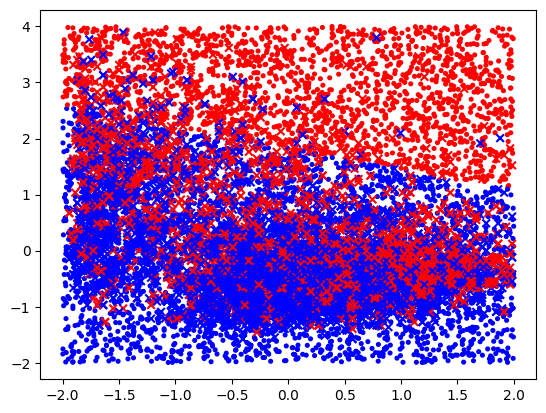

In [ ]:
X = wineData[["total sulfur dioxide", "volatile acidity"]]
y = wineData.quality

clf = svm.SVC(kernel='linear', class_weight={0: 9, 1: 10})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred, zero_division=1)
display('precision_recall_fscore_support values for SVM')
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

import random
n = 5000
newx = [random.uniform(-2,2) for _ in range(n)]
newy = [random.uniform(-2,4) for _ in range(n)]
df_temp = pd.DataFrame({'total sulfur dioxide':newx,'volatile acidity':newy})
newlabel = clf.predict(df_temp)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(wineData['total sulfur dioxide'], wineData['volatile acidity'], c=color, s=30, marker='x')

'precision_recall_fscore_support values for SVM'

'precision = [0.94444444 0.63862634]'

'recall = [0.00735612 0.99975339]'

'f-score = [0.01459854 0.77939056]'

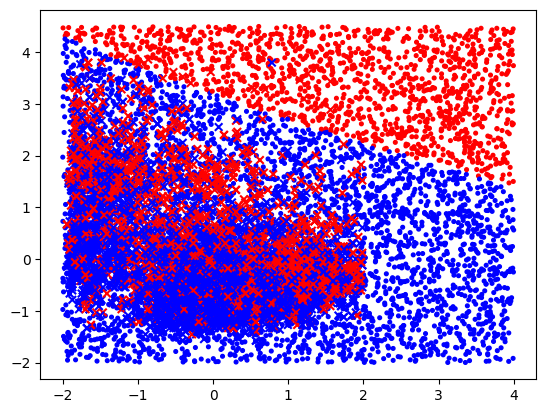

In [ ]:
import numpy as np
from sklearn.svm import SVC


X = wineData[["total sulfur dioxide", "volatile acidity"]]
y = wineData.quality

clf = SVC(kernel='poly', degree=3 , class_weight={0: 3, 1: 6})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred,zero_division=1)
display('precision_recall_fscore_support values for SVM')
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

# add random points
import random
n = 5000
newx = [random.uniform(-2,4) for _ in range(n)]
newy = [random.uniform(-2,4.5) for _ in range(n)]
df_temp = pd.DataFrame({'total sulfur dioxide':newx,'volatile acidity':newy})
newlabel = clf.predict(df_temp)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(wineData['total sulfur dioxide'], wineData['volatile acidity'], c=color, s=30, marker='x')

Precision = [0.93640777 0.91128658], Recall = [0.83470359 0.9676942 ], F-score = [0.88263555 0.9386437 ]


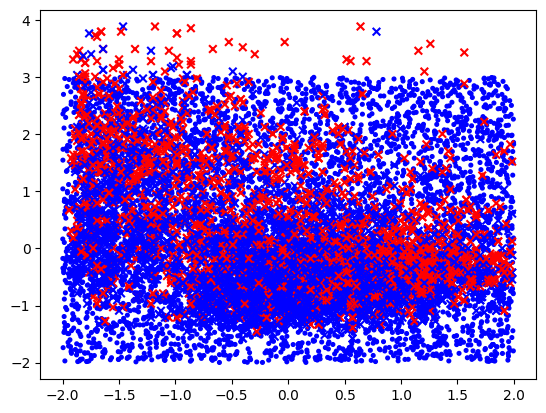

In [ ]:
import numpy as np
from sklearn.svm import SVC
import random

# Load the dataset and split into features and target
X = wineData[["total sulfur dioxide", "volatile acidity"]]
y = wineData.quality

# Compute the class frequencies
class_freq = np.bincount(y)

# Initialize the classifier with the computed class weights
clf = svm.SVC(kernel='rbf', gamma=5000)

# Train the classifier on the data
clf.fit(X, y)

# Evaluate the classifier on the data
y_pred = clf.predict(X)
p, r, f, s = precision_recall_fscore_support(y, y_pred, zero_division=1)

print('Precision = {}, Recall = {}, F-score = {}'.format(p, r, f))


import random
n = 5000
newx = [random.uniform(-2,2) for _ in range(n)]
newy = [random.uniform(-2,3) for _ in range(n)]
df_temp = pd.DataFrame({'total sulfur dioxide':newx,'volatile acidity':newy})
newlabel = clf.predict(df_temp)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(wineData['total sulfur dioxide'], wineData['volatile acidity'], c=color, s=30, marker='x')

In [ ]:
X = wineData[["total sulfur dioxide", "volatile acidity"]]
y = wineData.quality

clf = SVC(kernel='poly', degree=3 , class_weight={0: 1, 1: 2})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print("class_weight value 1")
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))
/

clf = SVC(kernel='poly', degree=3 , class_weight={0: 3, 1: 6})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print("class_weight value 2")
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


clf = SVC(kernel='poly', degree=3 , class_weight={0: 4, 1: 6})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print("class_weight value 3")
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))


clf = SVC(kernel='poly', degree=3 , class_weight={0: 5, 1: 8})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print("class_weight value 4")
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))



clf = SVC(kernel='poly', degree=3 , class_weight={0: 6, 1: 9})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print("class_weight value 5")
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))



clf = SVC(kernel='poly', degree=3 , class_weight={0: 7, 1: 8})
clf.fit(X, y)

y_pred = clf.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred)
print("class_weight value 6")
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

class_weight value 1


'precision = [0.94444444 0.63862634]'

'recall = [0.00735612 0.99975339]'

'f-score = [0.01459854 0.77939056]'

class_weight value 2


'precision = [0.94444444 0.63862634]'

'recall = [0.00735612 0.99975339]'

'f-score = [0.01459854 0.77939056]'

class_weight value 3


'precision = [0.70588235 0.64161758]'

'recall = [0.02596279 0.99383477]'

'f-score = [0.05008347 0.77979876]'

class_weight value 4


'precision = [0.75362319 0.64125774]'

'recall = [0.02250108 0.99580764]'

'f-score = [0.04369748 0.7801391 ]'

class_weight value 5


'precision = [0.70588235 0.64161758]'

'recall = [0.02596279 0.99383477]'

'f-score = [0.05008347 0.77979876]'

class_weight value 6


'precision = [0.69411765 0.64606198]'

'recall = [0.05106015 0.98717633]'

'f-score = [0.09512293 0.78099698]'

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import random
from sklearn.linear_model import LogisticRegression
from sklearn import svm

In [3]:
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [4]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [5]:
stroke_data.dropna(inplace = True)

<ipython-input-6-641b03da80ea>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  stroke_pred = stroke_data.drop(['id','stroke'],1)


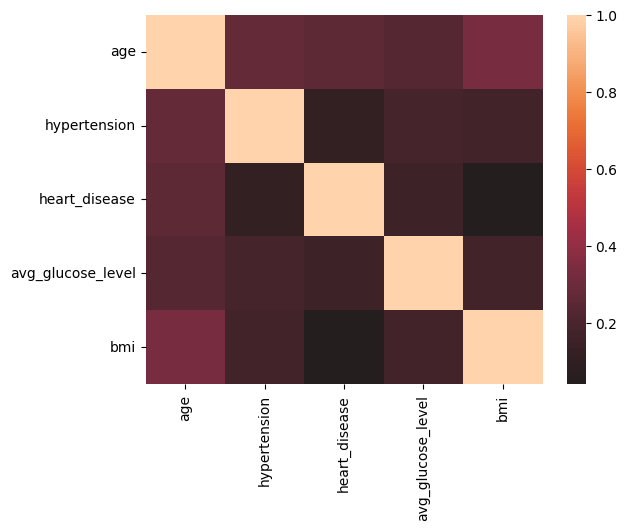

In [6]:
stroke_pred = stroke_data.drop(['id','stroke'],1)
sns.heatmap(stroke_pred.corr(), center=0);

In [7]:
stroke_pred.corr()

,age,hypertension,heart_disease,avg_glucose_level,bmi
age,1.000000,0.274425,0.257123,0.235838,0.333398
hypertension,0.274425,1.000000,0.115991,0.180543,0.167811
heart_disease,0.257123,0.115991,1.000000,0.154525,0.041357
avg_glucose_level,0.235838,0.180543,0.154525,1.000000,0.175502
bmi,0.333398,0.167811,0.041357,0.175502,1.000000


<Axes: ylabel='Frequency'>

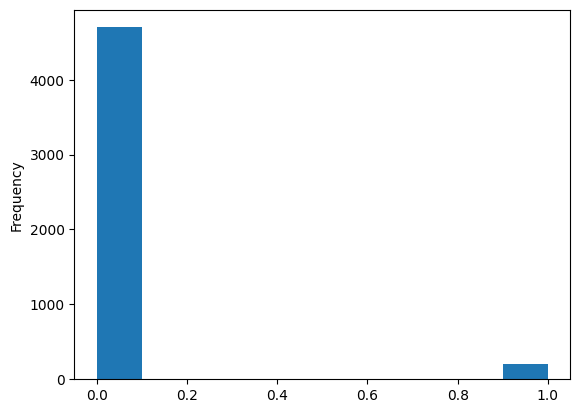

In [8]:
stroke_data['stroke'].plot(kind='hist')

In [9]:
from sklearn.preprocessing import StandardScaler
cols = ['avg_glucose_level', 'bmi', 'age']
scaler = StandardScaler()
stroke_data[cols] = scaler.fit_transform(stroke_data[cols])

In [10]:
stroke_data['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [11]:
df_majority = stroke_data[stroke_data['stroke']==0]
df_minority = stroke_data[stroke_data['stroke']==1]
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    
                                 n_samples=314)
#Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     
                                 n_samples=209)
# Combine minority class with downsampled majority class
stroke_data = pd.concat([df_majority_downsampled, df_minority_upsampled])

In [12]:
from sklearn.linear_model import LogisticRegression

X = stroke_data[['bmi', 'avg_glucose_level']]
y = stroke_data.stroke
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm = LogisticRegression(class_weight={0:1, 1:1.5})
lm.fit(X, y)

y_pred = lm.predict(X)
p,r,f,s = precision_recall_fscore_support(y, y_pred, zero_division=1)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))
display(X)
display(y)

'precision = [0.68965517 0.57714286]'

'recall = [0.76433121 0.48325359]'

'f-score = [0.72507553 0.52604167]'

,bmi,avg_glucose_level
4390,-0.597616,2.609980
3567,2.012763,-0.667161
3751,0.089996,-0.207231
593,-0.444813,-1.023983
5064,-0.584882,1.994039
...,...,...
208,0.599338,0.664002
4,-0.623083,1.549193
242,1.719891,2.895889
36,0.612072,2.575761


4390    0
3567    0
3751    0
593     0
5064    0
       ..
208     1
4       1
242     1
36      1
138     1
Name: stroke, Length: 523, dtype: int64

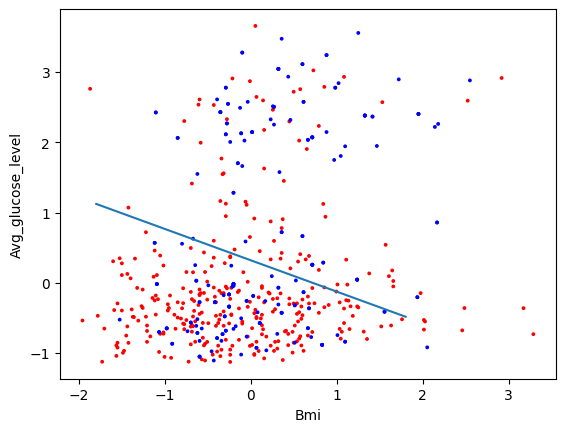

In [28]:
# Plot the dataset colored by actual value
color = ['r' if y_ == 0 else 'b' for y_ in y]
plt.scatter(stroke_data.bmi, stroke_data.avg_glucose_level, c=color, s=3)
plt.xlabel('Bmi')
plt.ylabel('Avg_glucose_level')
Xdb = [-1.8, 1.8]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)

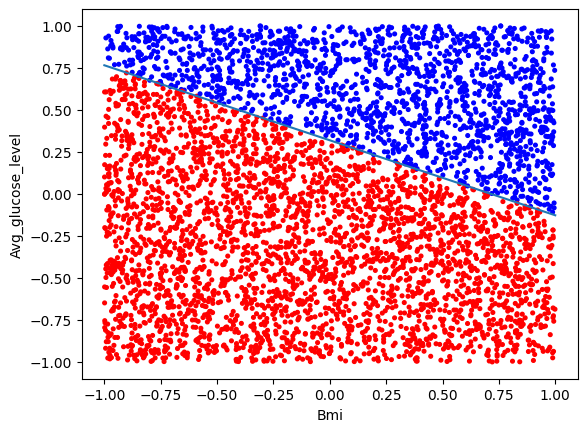

In [14]:
# Plot random points colored by predicted value
b0 = lm.intercept_
b = lm.coef_[0]

# Plot random points colored by prediction
import random

n = 5000
newx = [random.uniform(-1,1) for _ in range(n)]
newy = [random.uniform(-1,1) for _ in range(n)]
df_temp = pd.DataFrame({'bmi':newx,'avg_glucose_level':newy})
newlabel = lm.predict(df_temp)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.figure()
plt.scatter(newx, newy, c=color, marker='o', s=7)
plt.xlabel('Bmi')
plt.ylabel('Avg_glucose_level')


# Show original data
# color = ['r' if y_ == 0 else 'b' for y_ in y]
# plt.scatter(stroke_data.age, stroke_data.avg_glucose_level, c=color, s=3)

b0 = lm.intercept_[0]
b = lm.coef_[0]

Xdb = [-1.0, 1.0]
ydb = [-(b0+b[0]*x)/b[1] for x in Xdb]
plt.plot(Xdb, ydb)
# plt.xlabel('Age')
# plt.ylabel('Avg_glucose_level')

In [15]:
smoke_dummie = pd.get_dummies(stroke_data.smoking_status,prefix='smoker',drop_first=True)
married_dummie = pd.get_dummies(stroke_data.ever_married,prefix='married',drop_first=True)
work_dummie = pd.get_dummies(stroke_data.work_type,prefix='work',drop_first=True)
residnece_dummie = pd.get_dummies(stroke_data.Residence_type,prefix='residence',drop_first=True)
gender_dummie = pd.get_dummies(stroke_data.gender,prefix='gender',drop_first=True)
dummie_data = pd.concat([smoke_dummie,married_dummie,work_dummie],axis=1)
stroke_data = stroke_data.drop(['work_type','ever_married',
                  'Residence_type','smoking_status',
                  'gender','id'],axis=1)
stroke_data = pd.concat([stroke_data,dummie_data],axis=1)
stroke_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,smoker_formerly smoked,smoker_never smoked,smoker_smokes,married_Yes,work_Never_worked,work_Private,work_Self-employed,work_children
4390,1.247499,1,1,2.609980,-0.597616,0,0,0,0,1,0,1,0,0
3567,-0.437434,0,0,-0.667161,2.012763,0,0,1,0,1,0,0,0,0
3751,-0.304413,0,0,-0.207231,0.089996,0,0,1,0,0,0,1,0,0
593,-0.570455,0,0,-1.023983,-0.444813,0,0,1,0,1,0,1,0,0
5064,1.203159,0,0,1.994039,-0.584882,0,0,0,0,1,0,0,1,0


In [16]:
stroke_data.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'stroke', 'smoker_formerly smoked', 'smoker_never smoked',
       'smoker_smokes', 'married_Yes', 'work_Never_worked', 'work_Private',
       'work_Self-employed', 'work_children'],
      dtype='object')

In [17]:
from sklearn.model_selection import train_test_split, cross_val_score
feature_cols = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi',
       'smoker_formerly smoked', 'smoker_never smoked',
       'smoker_smokes', 'married_Yes', 'work_Never_worked', 'work_Private',
       'work_Self-employed', 'work_children']
X = stroke_data[feature_cols]
y = stroke_data.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
lm = LogisticRegression(class_weight={0:0.9, 1:1})
lm.fit(X_train, y_train)
# value = getPrecision(lm, X_test, y_test)
# print(value)
y_pred = lm.predict(X_test)
p,r,f,s = precision_recall_fscore_support(y_test, y_pred, zero_division=1)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))
lm.score(X_test, y_test)


'precision = [0.85       0.68888889]'

'recall = [0.78461538 0.775     ]'

'f-score = [0.816      0.72941176]'

0.780952380952381

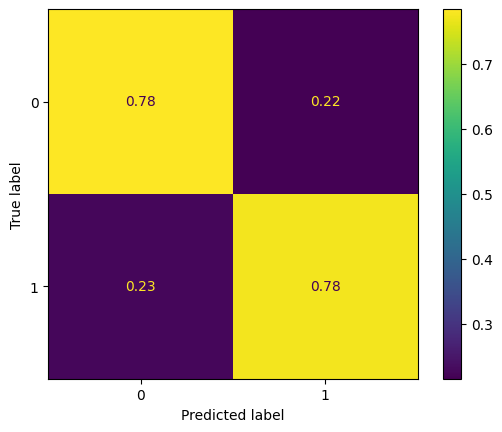

In [29]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# cm = confusion_matrix(y_test, y_pred, labels=lm.classes_)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,display_labels=lm.classes_,normalize = 'true')
# disp.plot()
#plt.show()

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.78      0.82        65
           1       0.69      0.78      0.73        40

    accuracy                           0.78       105
   macro avg       0.77      0.78      0.77       105
weighted avg       0.79      0.78      0.78       105



In [69]:
coef_table = pd.DataFrame(list(X_train.columns)).copy()
coef_table.insert(len(coef_table.columns),"Coefs",lm.coef_.transpose())
coef_table

,0,Coefs
0,age,1.873451
1,hypertension,0.454457
2,heart_disease,0.088914
3,avg_glucose_level,0.193199
4,bmi,0.077010
5,smoker_formerly smoked,-0.028714
6,smoker_never smoked,-0.202034
7,smoker_smokes,0.590530
8,married_Yes,0.392335
9,work_Never_worked,-0.011930


In [60]:
import numpy as np
from sklearn.svm import SVC
import random

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV

C_range = [0.01, 0.1,1.0,10]
gamma_range = [0.1, 1, 3, 5, 10, 20, 50]
class_range = [{0:0.8, 1:2},{0:0.95, 1:1.3},{0:0.9, 1:1},{0:1, 1:1.5},'balanced']
param_grid = dict(class_weight=class_range, C=C_range)
# param_grid = dict(gamma=gamma_range, C=C_range)
# param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='linear'), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.01, 'class_weight': {0: 0.9, 1: 1}} with a score of 0.66


'precision = [0.68181818 0.65354331]'

'recall = [0.85987261 0.39712919]'

'f-score = [0.76056338 0.49404762]'

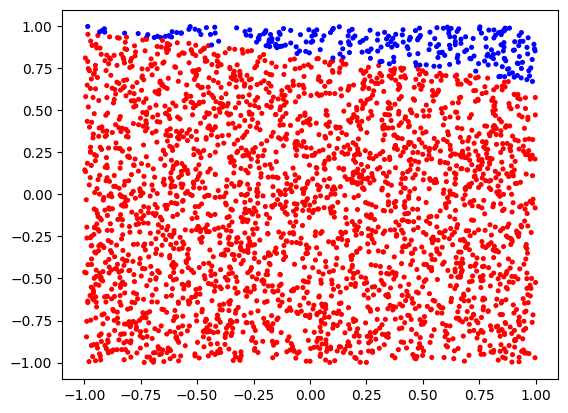

In [62]:

clf = svm.SVC(kernel='linear', C = 0.1 , class_weight='balanced')

# Train the classifier on the data
X = stroke_data[['bmi', 'avg_glucose_level']]
y = stroke_data.stroke
clf.fit(X,y)

# Evaluate the classifier on the data
y_pred = clf.predict(X)
# p, r, f, s = precision_recall_fscore_support(y_test, y_pred, zero_division=1)

# print('Precision = {}, Recall = {}, F-score = {}'.format(p, r, f))


import random
n = 3000
newx = [random.uniform(-1,1) for _ in range(n)]
newy = [random.uniform(-1,1) for _ in range(n)]
df_temp = pd.DataFrame({'bmi':newx,'avg_glucose_level':newy})
newlabel = clf.predict(df_temp)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

p,r,f,s = precision_recall_fscore_support(y, y_pred, zero_division=1)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

# color = ['r' if y_ == 0 else 'b' for y_ in y]
# plt.scatter(stroke_data['age'], stroke_data['avg_glucose_level'], c=color, s=30, marker='x')

In [48]:
C_range = [0.01, 0.1,1.0,10]
gamma_range = [0.1, 1, 3, 5, 10, 20, 50]
class_range = [{0:0.8, 1:2},{0:0.95, 1:1.3},{0:0.9, 1:1},{0:1, 1:1.5},'balanced']
degree_range = [2,3,4]
param_grid = dict(class_weight=class_range, C=C_range,degree=degree_range)
# param_grid = dict(gamma=gamma_range, C=C_range)
# param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='poly'), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 0.01, 'class_weight': {0: 1, 1: 1.5}, 'degree': 2} with a score of 0.67


'precision = [0.68085106 0.74      ]'

'recall = [0.91719745 0.35406699]'

'f-score = [0.78154681 0.4789644 ]'

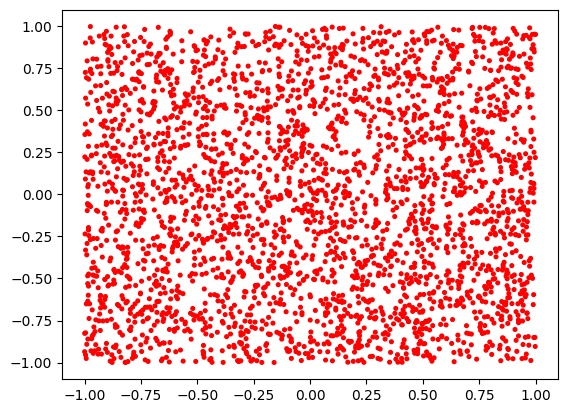

In [49]:
clf = svm.SVC(kernel='poly', degree = 2, C = 0.01 , class_weight={0: 1, 1: 1.5})

# Train the classifier on the data
X = stroke_data[['bmi', 'avg_glucose_level']]
y = stroke_data.stroke
clf.fit(X,y)

# Evaluate the classifier on the data
y_pred = clf.predict(X)
# p, r, f, s = precision_recall_fscore_support(y_test, y_pred, zero_division=1)

# print('Precision = {}, Recall = {}, F-score = {}'.format(p, r, f))


import random
n = 3000
newx = [random.uniform(-1,1) for _ in range(n)]
newy = [random.uniform(-1,1) for _ in range(n)]
df_temp = pd.DataFrame({'bmi':newx,'avg_glucose_level':newy})
newlabel = clf.predict(df_temp)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

p,r,f,s = precision_recall_fscore_support(y, y_pred, zero_division=1)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

# color = ['r' if y_ == 0 else 'b' for y_ in y]
# plt.scatter(stroke_data['age'], stroke_data['avg_glucose_level'], c=color, s=30, marker='x')

In [64]:
C_range = [0.01, 0.1,1.0,10]
gamma_range = [0.1, 1, 3, 5, 10, 20, 50]
class_range = [{0:0.8, 1:2},{0:0.95, 1:1.3},{0:0.9, 1:1},{0:1, 1:1.5},'balanced']
degree_range = [2,3,4]
param_grid = dict(gamma=gamma_range,class_weight=class_range, C=C_range)
# param_grid = dict(gamma=gamma_range, C=C_range)
# param_grid = dict(C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(kernel='rbf'), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 10, 'class_weight': {0: 1, 1: 1.5}, 'gamma': 50} with a score of 0.75


'precision = [0.97689769 0.91818182]'

'recall = [0.94267516 0.96650718]'

'f-score = [0.95948136 0.94172494]'

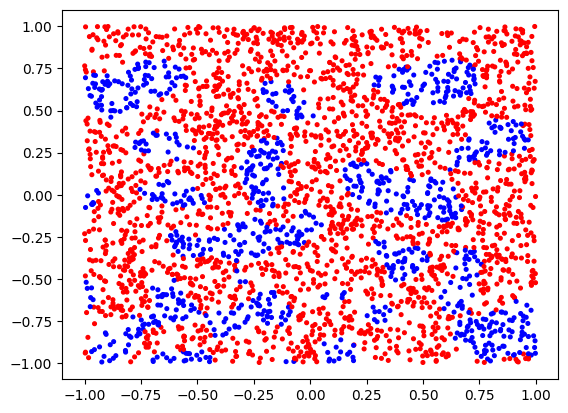

In [63]:
clf = svm.SVC(kernel='rbf', C = 10 , gamma =50, class_weight={0: 1, 1: 1.5})

# Train the classifier on the data
X = stroke_data[['bmi', 'avg_glucose_level']]
y = stroke_data.stroke
clf.fit(X,y)

# Evaluate the classifier on the data
y_pred = clf.predict(X)
# p, r, f, s = precision_recall_fscore_support(y_test, y_pred, zero_division=1)

# print('Precision = {}, Recall = {}, F-score = {}'.format(p, r, f))


import random
n = 3000
newx = [random.uniform(-1,1) for _ in range(n)]
newy = [random.uniform(-1,1) for _ in range(n)]
df_temp = pd.DataFrame({'bmi':newx,'avg_glucose_level':newy})
newlabel = clf.predict(df_temp)

color = ['r' if y_ == 0 else 'b' for y_ in newlabel]
plt.scatter(newx, newy, c=color, marker='o', s=7);

p,r,f,s = precision_recall_fscore_support(y, y_pred, zero_division=1)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

# color = ['r' if y_ == 0 else 'b' for y_ in y]
# plt.scatter(stroke_data['age'], stroke_data['avg_glucose_level'], c=color, s=30, marker='x')

In [65]:
C_range = [0.01, 0.1,1.0,10]
gamma_range = [0.1, 1, 3, 5, 10, 20, 50]
class_range = [{0:0.8, 1:2},{0:0.95, 1:1.3},{0:0.9, 1:1},{0:1, 1:1.5},'balanced']
degree_range = [2,3,4]
kernels = ['linear','poly','rbf']
param_grid = dict(gamma=gamma_range,class_weight=class_range, C=C_range,degree=degree_range)
# param_grid = dict(gamma=gamma_range, C=C_range)
# param_grid = dict(C=C_range)
X = stroke_data[feature_cols]
y = stroke_data.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X_train, y_train)

print("The best parameters are %s with a score of %0.2f" % (grid.best_params_, grid.best_score_))

The best parameters are {'C': 1.0, 'class_weight': {0: 0.9, 1: 1}, 'degree': 2, 'gamma': 50} with a score of 0.83


In [67]:
clf = svm.SVC(kernel='rbf', C = 1.0 , gamma =50, class_weight={0: 0.9, 1: 1})

# Train the classifier on the data
X = stroke_data[feature_cols]
y = stroke_data.stroke
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train,y_train)

# Evaluate the classifier on the data
y_pred = clf.predict(X_test)
# p, r, f, s = precision_recall_fscore_support(y_test, y_pred, zero_division=1)

# print('Precision = {}, Recall = {}, F-score = {}'.format(p, r, f))


p,r,f,s = precision_recall_fscore_support(y_test, y_pred, zero_division=1)
display('precision = {}'.format(p))
display('recall = {}'.format(r))
display('f-score = {}'.format(f))

# color = ['r' if y_ == 0 else 'b' for y_ in y]
# plt.scatter(stroke_data['age'], stroke_data['avg_glucose_level'], c=color, s=30, marker='x')

'precision = [0.83333333 1.        ]'

'recall = [1.    0.675]'

'f-score = [0.90909091 0.80597015]'